In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from Timer import Timer
from file_utils import read_lines_tsv

In [14]:
# Loading dataset from file
    # source: https://graphchallenge.mit.edu/data-sets
    # file_source: https://graphchallenge.s3.amazonaws.com/snap/as20000102/as20000102_adj.tsv
    # file_format: Adjacency TSV (Tab-Separated Values)
        # <dataset-name>_adj.tsv
        # (Row, Col, Value) tuple describing the adjacency matrix of the graph in tab separated format.
        # Adjacency matrix is of size Num_vertices x Num_vertices
    # file: as20000102_adj.tsv (Autonomous Systems graph from January 02 2000)
    # num of nodes:      6.474
    # num of edges:     25.144
    # num of triangles:  6.584

Timer.start()

G = nx.read_edgelist('../datasets/as20000102_adj.tsv', data=(('ajd_value',float),))
print(nx.info(G))

Timer.finish()

Name: 
Type: Graph
Number of nodes: 6474
Number of edges: 12572
Average degree:   3.8838
elapsed time: 0.116400


In [15]:
# Alternative way to build graphs from file
# This will allow to generate random samples of graphs from a list of edges in memory

Timer.start()

lines = read_lines_tsv('../datasets/as20000102_adj.tsv')
G = nx.parse_edgelist(lines, nodetype = int, data=(('ajd_value',float),))
print(nx.info(G))
print(('Number of lines: %s') % len(lines))

Timer.finish()

Name: 
Type: Graph
Number of nodes: 6474
Number of edges: 12572
Average degree:   3.8838
Number of lines: 25144
elapsed time: 0.107171


In [16]:
Timer.start()

print('Number of nodes: ', G.number_of_nodes())
print('Number of edges: ', G.number_of_edges())
# each triangle is counted 3 times then divided by 3
print('Number of triangles: ', int(sum(list(nx.triangles(G).values()))/3))
# clustering coefficient of G
cc = nx.average_clustering(G)
print('Clustering coefficient of G: ', cc)

Timer.finish()

Number of nodes:  6474
Number of edges:  12572
Number of triangles:  6584
Clustering coefficient of G:  0.2522224351161442
elapsed time: 0.473544


In [17]:
# Using samples to build graphs and to calculate 

m, ccGraph, ccSample, ccSubG = [], [], [], []
sampleG, subG = nx.Graph(), nx.Graph()

for i in range(1000, len(lines)+1, 1000):
    Timer.start()
    
    sampleG.clear() # our sample graph
    subG.clear()    # a subgraph from complete graph
    sample = np.random.choice(lines, i, replace=False) # getting edges from list with random choice
    sampleG = nx.parse_edgelist(sample, nodetype = int, data=(('ajd_value',float),))
    # creating a subgraph of G using nodes of the sample graph
    subG = G.subgraph(sampleG.nodes).copy()
    nnSampleG = sampleG.number_of_nodes()
    nnSubG = subG.number_of_nodes()
    m.append(nnSampleG)
    ccGraph.append(cc) # clustering coefficient of entire graph G
    ccSample.append(nx.average_clustering(sampleG))
    ccSubG.append(nx.average_clustering(subG))
    
    elapsed = Timer.get_elapsed()
    print('Elapsed time for %d lines : %f, nnSampleG: %d, nnSubG: %d' % (i, elapsed, nnSampleG, nnSubG))
    
#print('Graph builded with %s lines:' % i)
#print(nx.info(G))
#print('Number of triangles: ', int(sum(list(nx.triangles(G).values()))/3))
#print('---------------------------------------')

Elapsed time for 1000 lines : 0.083637, nnSampleG: 1157, nnSubG: 1157
Elapsed time for 2000 lines : 0.125148, nnSampleG: 1951, nnSubG: 1951
Elapsed time for 3000 lines : 0.196792, nnSampleG: 2629, nnSubG: 2629
Elapsed time for 4000 lines : 0.227536, nnSampleG: 3188, nnSubG: 3188
Elapsed time for 5000 lines : 0.271817, nnSampleG: 3703, nnSubG: 3703
Elapsed time for 6000 lines : 0.357465, nnSampleG: 4083, nnSubG: 4083
Elapsed time for 7000 lines : 0.339260, nnSampleG: 4446, nnSubG: 4446
Elapsed time for 8000 lines : 0.378774, nnSampleG: 4778, nnSubG: 4778
Elapsed time for 9000 lines : 0.405103, nnSampleG: 5040, nnSubG: 5040
Elapsed time for 10000 lines : 0.452275, nnSampleG: 5282, nnSubG: 5282
Elapsed time for 11000 lines : 0.454416, nnSampleG: 5399, nnSubG: 5399
Elapsed time for 12000 lines : 0.475213, nnSampleG: 5589, nnSubG: 5589
Elapsed time for 13000 lines : 0.525474, nnSampleG: 5785, nnSubG: 5785
Elapsed time for 14000 lines : 0.563043, nnSampleG: 5936, nnSubG: 5936
Elapsed time fo

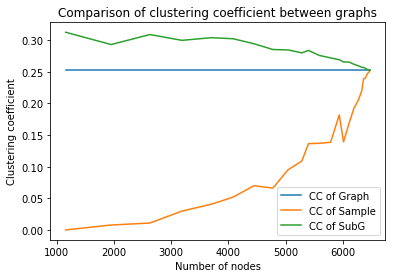

In [18]:
plt.plot(m, ccGraph, label='CC of Graph')
plt.plot(m, ccSample, label='CC of Sample')
plt.plot(m, ccSubG, label='CC of SubG')
plt.legend()
plt.title('Comparison of clustering coefficient between graphs')
plt.xlabel('Number of nodes')
plt.ylabel('Clustering coefficient')
plt.show()